# Computação Evolucionária - TP PSO

## Introdução

## Metodologia

### Função unimodal
A função unimodal escolhida foi a 5 (Different Powers Function)

### Função multimodal
A função multimodal escolhida foi a 10 (Rotated Griewank's Function) 

## Resultados

Inicialmente, é necessário importar as bibliotecas necessárias para o desenvolvimento do trabalho. Está sendo utilizada a versão 3.8.5 do Python, e as bibliotecas `numpy`, `pandas`, `matplotlib` e `seaborn`.

In [1]:
# importando bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d


E também importar os dados necessários e definir as variáveis para as instâncias do problema a serem estudadas

In [2]:
# Ler os dados de shift fornecidos
shift_data = pd.read_fwf('data/shift_data.txt', header=None)

# Ler a matriz M
M_D10 = pd.read_fwf('data/M_D10.txt', header=None)

# Definições padrões para os testes
D = 10
n_executions = 31
max_fevals = 100000
ub = [100]*D
lb = [-100]*D

O proximo passo é implementar e validar a implementação das funções de teste escolhidas para estudo.

In [3]:
class DifferentPowersFunction:
    """
    Função 5 - Different Powers Function
    """
    def __init__(self, o, D=10, f_star=-1000):
        self.o = o
        self.D = D
        self.f_star = f_star

    def func(self, x):
        z = x - self.o
        z_sum = np.sum([(np.abs(z[i])) ** (2 + 4*(i)/(self.D-1)) for i in np.arange(start=0, stop=self.D)])
        return np.sqrt(np.sum(z_sum)) + self.f_star


In [4]:
class RotatedGriewanksFunction:
    """
    Função 10 - Rotated Griewanks's Function
    """
    def __init__(self, o, M1, alpha=100, D=10, f_star=-500):
        self.o = o
        self.D = D
        self.f_star = f_star
        self.M1 = M1
        self.diag = np.diag([alpha ** (i/(2*(D-1))) for i in np.arange(self.D)])

    def calculate_z(self, x):
        return self.diag @ self.M1 @ (6 * (x - self.o))

    def func(self, x):
        z = self.calculate_z(x)
        part1 = np.sum([(z[i]**2)/4000 for i in np.arange(self.D)])
        part2 = -np.prod([np.cos(z[i]/np.sqrt(i+1)) for i in np.arange(self.D)])
        return part1 + part2 + 1 + self.f_star

In [5]:
def plot_function_2d(func, n, bx=[-100, 100], by=[-100,100], title=''):
    """
    Plota a superfície e curvas de níveis para uma função de testes
    """

    lb, ub = bx
    x = np.linspace(lb, ub, n)
    lb, ub = by
    y = np.linspace(lb, ub, n)
    xv, yv = np.meshgrid(x, y)
    z = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            z[i,j] = func(np.array([xv[i,j], yv[i,j]]))

    fig = plt.figure(num=None, figsize=(12, 6))
    fig.suptitle(title)

    ax1 = fig.add_subplot(121, projection='3d')
    ax2 = fig.add_subplot(122)

    ax1.plot_surface(xv, yv, z, cmap='jet', edgecolor='none')
    cs = ax2.contour(x,y,z, cmap='jet', levels=50)
    fig.colorbar(cs, ax=ax2)
    plt.show()



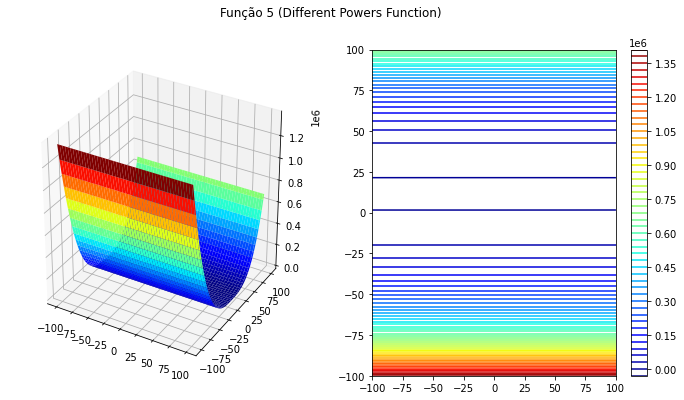

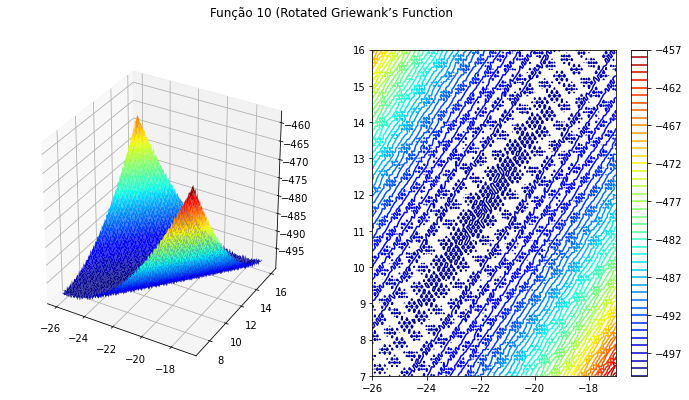

In [6]:
# Ler a matriz para duas dimensões
M_D2 = pd.read_fwf('data/M_D2.txt', header=None)
# número de dimensões para gráficos
D_plot = 2
# selecionar um único valor de shift
o_used = shift_data.iloc[0, :D_plot].to_numpy()
# selecionar duas matrizes de rotação
M1 = M_D2.iloc[:2, :].to_numpy()

unimodal_2d = DifferentPowersFunction(o_used, D=D_plot)
multimodal_2d = RotatedGriewanksFunction(o_used, M1, D=D_plot)

plot_function_2d(unimodal_2d.func, 100, title='Função 5 (Different Powers Function)')
plot_function_2d(multimodal_2d.func, 100, bx=[-26,-17],by=[7,16], title='Função 10 (Rotated Griewank’s Function')


Através dos gráficos acima, é possível ver que as funções implementadas retornam os mesmos valores exibidos em [1]. Logo, o próximo passo consiste em implementar o algoritmo PSO e executar os experimentos propostos para o trabalho.

### Desenvolvimento do algoritmo

O algoritmo PSO foi desenvolvido em um arquivo separado ``pso.py``. A implementação será validada sobre uma função quadrática simples em duas dimensões para avaliar o seu correto funcionamento. É esperada uma convergência rápida para o mínimo local em $x^* = (0,0)$.


In [7]:
# importar o otimizador
from pso import PSO

# criar instancia da função de teste quadrática
quad_func = lambda x: x[0]**2 + x[1]**2

# Executar o algoritmo
pso_unimodal = PSO(quad_func, [-10,-10] , [10,10], max_feval=100000, swarm_size=100, acceleration=[0.1, 0.1], constrition=0.5, inertia=0.5)
pso_unimodal.run() 


Best global particle: [ 1.71775598e-15 -3.42606619e-16]
Best global cost: 3.0680648893878003e-30


(array([ 1.71775598e-15, -3.42606619e-16]), 3.0680648893878003e-30)

A partir dos resultados anteriores, é possível constatar que o algoritmo 

In [8]:

# selecionar um único valor de shift
o_test = shift_data.iloc[0, :D].to_numpy()
# selecionar matriz de rotação
M1 = M_D10.iloc[:D, :].to_numpy()

unimodal = DifferentPowersFunction(o_test, D=D)
multimodal = RotatedGriewanksFunction(o_test, M1, D=D)

In [9]:
# Executar o algoritmo
pso_unimodal = PSO(unimodal.func, lb, ub, max_feval=100000, swarm_size=1000, acceleration=[0.1, 0.1], constrition=0.5, inertia=0.7)
pso_unimodal.run()

Best global particle: [ -7.24599729  -6.43171581 -37.01762782  44.33376039 -41.67187691
 -46.92789242  48.96157256  14.74692395  66.90030426 -20.36803115]
Best global cost: -777.6158623250101


(array([ -7.24599729,  -6.43171581, -37.01762782,  44.33376039,
        -41.67187691, -46.92789242,  48.96157256,  14.74692395,
         66.90030426, -20.36803115]),
 -777.6158623250101)

In [10]:
# Executar o algoritmo - lbest Ring
pso_unimodal = PSO(unimodal.func, lb, ub, max_feval=100000, swarm_size=1000, acceleration=[0.1, 0.1], constrition=0.5, inertia=0.7, topology='lbest')
pso_unimodal.run()

Best global particle: [ 30.98451973 -35.73991013  39.79884967 -40.39408984  18.51210303
 -26.82819789  62.28218333  10.49429021  52.812317   -27.72362621]
Best global cost: 3311.340808631703


(array([ 30.98451973, -35.73991013,  39.79884967, -40.39408984,
         18.51210303, -26.82819789,  62.28218333,  10.49429021,
         52.812317  , -27.72362621]),
 3311.340808631703)

In [11]:
# Executar o algoritmo
pso_multimodal = PSO(multimodal.func, lb, ub, max_feval=100000, swarm_size=100, acceleration=[0.1, 0.1], constrition=0.5, inertia=0.7)
pso_multimodal.run()

Best global particle: [-19.98788449  12.05360303 -26.50609241  58.12140109 -36.25198286
 -37.44871695  63.36594788  14.69253337  65.61278963   1.20645025]
Best global cost: -472.7693695654885


(array([-19.98788449,  12.05360303, -26.50609241,  58.12140109,
        -36.25198286, -37.44871695,  63.36594788,  14.69253337,
         65.61278963,   1.20645025]),
 -472.7693695654885)

In [12]:
# Executar o algoritmo
pso_multimodal = PSO(multimodal.func, lb, ub, max_feval=100000, swarm_size=1000, acceleration=[0.1, 0.1], constrition=0.5, inertia=0.7, topology='lbest')
pso_multimodal.run()

Best global particle: [-18.8298494   -6.25842586 -31.8122428   73.07455502 -28.10333085
 -42.87553097  87.46659093  33.34953993  71.66570829  39.80304949]
Best global cost: -157.70874680368888


(array([-18.8298494 ,  -6.25842586, -31.8122428 ,  73.07455502,
        -28.10333085, -42.87553097,  87.46659093,  33.34953993,
         71.66570829,  39.80304949]),
 -157.70874680368888)

## Resultados

In [15]:
def run_experiment(func, lb, ub, constrition, inertia, n_runs = 31, max_feval=10000, swarm_size=1000, acceleration=[0.05, 0.05]):
    data = np.zeros((n_runs, 2))
    for i in range(n_runs):
        pso_lbest = PSO(func, lb, ub, max_feval, swarm_size, acceleration, constrition, inertia, topology='lbest')
        pso_gbest = PSO(func, lb, ub, max_feval, swarm_size, acceleration, constrition, inertia, topology='gbest')

        best_solution_lbest, best_cost_lbest = pso_lbest.run()
        best_solution_gbest, best_cost_gbest = pso_gbest.run()

        data[i,0] = best_cost_lbest
        data[i,1] = best_cost_gbest
        print('Finished run #{}'.format(i))

    
    results = pd.DataFrame(data, columns=['lbest', 'gbest'])
    results['constrition'] = [constrition] * n_runs
    results['inertia'] = [inertia] * n_runs

    return results


In [17]:
exp_1 = run_experiment(multimodal.func, lb, ub, constrition=1, inertia=1)
exp_2 = run_experiment(multimodal.func, lb, ub, constrition=1, inertia=0.5)
exp_3 = run_experiment(multimodal.func, lb, ub, constrition=0.5, inertia=1)
exp_4 = run_experiment(multimodal.func, lb, ub, constrition=0.5, inertia=0.5)

 360.63596515911036
Finished run #11
Best global particle: [  8.05528764  34.91394804 -29.79050479  27.32801013 -23.96046376
 -86.38713464  38.73603389 -15.57154748  69.85261512 -67.13292428]
Best global cost: -4.777418396326368
Best global particle: [ 18.8878842   20.59170489  46.67228871  18.97126954 -39.03377999
 -87.88923595  45.16525165  34.42472139  39.04663843 -90.30676216]
Best global cost: 425.41027416199177
Finished run #12
Best global particle: [-29.90098271 -49.64750771 -53.0087314   95.53742863  -5.1896475
   3.08991661  69.31553846  44.6385897   25.81984795  73.3016631 ]
Best global cost: 618.6094939186348
Best global particle: [-25.93235987  37.73545242 -35.09820522  80.8613417   -1.23371286
 -26.58337404   7.75446476  33.859315     4.0455033   13.27749562]
Best global cost: 493.7304950171864
Finished run #13
Best global particle: [-15.82680113  37.44539242 -60.3075941   73.1041384  -40.95692169
 -25.4680661   93.19669412 -14.83475422  29.76990837  41.3482863 ]
Best glob

In [28]:
all_data = pd.concat([exp_1, exp_2, exp_3, exp_4], ignore_index=True)
stats = all_data.groupby(['constrition','inertia']).aggregate([np.mean, np.std])
display(stats)

lbest                   gbest            
                           mean         std        mean         std
constrition inertia                                                
0.5         0.5      268.493281  256.950941  398.478207  206.360457
            1.0      248.034866  205.069608  269.761817  205.661029
1.0         0.5      148.244706  197.718682  124.907377  138.207458
            1.0       96.177423  144.157012 -370.563418   69.425590

lbest                   gbest            
                           mean         std        mean         std
constrition inertia                                                
0.5         0.5      268.493281  256.950941  398.478207  206.360457
            1.0      248.034866  205.069608  269.761817  205.661029
1.0         0.5      148.244706  197.718682  124.907377  138.207458
            1.0       96.177423  144.157012 -370.563418   69.425590

## Conclusão

## Referências

[[1]] J. J. Liang, B-Y. Qu, P. N. Suganthan, Alfredo G. Hern´andez-D´ıaz, "Problem Definitions and Evaluation
Criteria for the CEC 2013 Special Session and Competition on Real-Parameter Optimization", Technical Report 201212, Computational Intelligence Laboratory, Zhengzhou University, Zhengzhou China and
Technical Report, Nanyang Technological University, Singapore, January 2013.